<a href="https://colab.research.google.com/github/Ritesh1126/Machine_Learning_lab/blob/main/practical_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("/content/train.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())  # Display first few rows



Dataset Loaded Successfully!

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sal

In [2]:
print(df.tail())  # Display bottom of few rows

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  

In [3]:

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [4]:
# Select relevant columns and drop missing values
df = df[['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'SalePrice']].dropna()


In [5]:
# Select features and target
features = ['GrLivArea', 'TotalBsmtSF', 'GarageCars']
target = 'SalePrice'
X = df[features]
y = df[target]



In [6]:
 #Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
# to show linear regression
# 4th Practical: Linear Regression Model
print("\nExecuting 4th Practical: Linear Regression\n")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("\nLinear Regression Performance:")
print(f"MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}")




Executing 4th Practical: Linear Regression


Linear Regression Performance:
MAE: 29309.79, MSE: 2044138570.85, RMSE: 45212.15


In [9]:
# Bonus Practical: KNN Regression Model
print("\nExecuting Bonus Practical: KNN Regression\n")
k_values = [3, 5, 7]
knn_errors = []
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_knn = knn_model.predict(X_test_scaled)
    rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    knn_errors.append(rmse_knn)
    print(f"\nKNN Regression (k={k}) Performance:")
    print(f"RMSE: {rmse_knn:.2f}")



Executing Bonus Practical: KNN Regression


KNN Regression (k=3) Performance:
RMSE: 41817.33

KNN Regression (k=5) Performance:
RMSE: 40410.54

KNN Regression (k=7) Performance:
RMSE: 39893.01


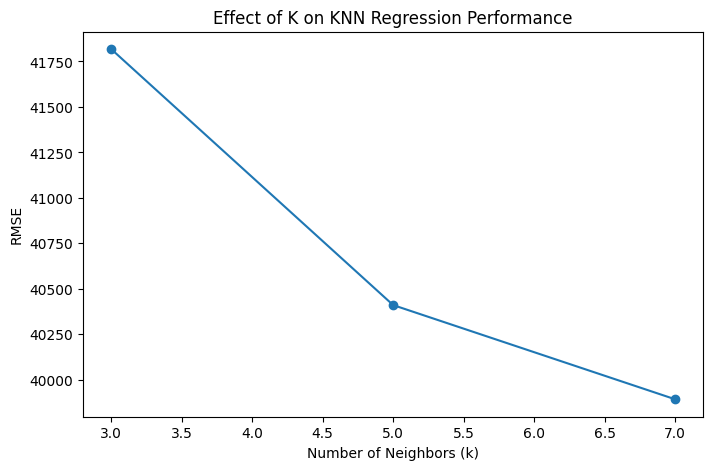

In [10]:
# Visualize K vs RMSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_errors, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('Effect of K on KNN Regression Performance')
plt.show()